<a href="https://colab.research.google.com/github/basmalagamal/Machine-Learning-Project/blob/main/Houseprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **Data Reading and Understanding**

In [4]:
df = pd.read_csv('/content/house_prices.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,N,0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,N,0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,N,0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,N,0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,N,0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,N,0,...,11,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,N,0,...,7,1715.0,0.0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,N,0,...,7,1060.0,0.0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,N,0,...,7,1050.0,730.0,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,N,0,...,7,1890.0,0.0,2003,0,98038,47.3684,-122.031,NaN,7570.0


In [5]:
df.shape

(21613, 21)

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
#Check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21612 non-null  float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# **Data Cleaning**

In [8]:
#Null Values
df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [9]:
df.dropna(inplace=True)

In [10]:
#Check Duplicated Data
df.duplicated().sum()

0

In [11]:
#drop id and date -Unnecessary columns-
df.drop(columns=['id', 'date'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,N,0,Average,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,538000,3,2.25,2570,7242,2.0,N,0,Average,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,180000,2,1.00,770,10000,1.0,N,0,Average,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,604000,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,510000,3,2.00,1680,8080,1.0,N,0,Average,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [12]:
#Unique Values
for column in df.columns:
    print(column ,":", df[column].nunique())

price : 4028
bedrooms : 13
bathrooms : 30
sqft_living : 1038
sqft_lot : 9780
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 12
sqft_above : 946
sqft_basement : 306
yr_built : 116
yr_renovated : 70
zipcode : 70
lat : 5034
long : 752
sqft_living15 : 777
sqft_lot15 : 8689


In [13]:
#check Data Validity (data entry check)

for column in df.columns:
    print(column ,":", df[column].unique())

price : [ 221900  538000  180000 ...  610685 1007500  402101]
bedrooms : [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms : [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
sqft_living : [1180 2570  770 ... 3087 3118 1425]
sqft_lot : [ 5650  7242 10000 ...  1126  2388  1076]
floors : [1.  2.  1.5 3.  2.5 3.5]
waterfront : ['N' 'Y']
view : [0 3 4 2 1]
condition : ['Average' 'Very Good' 'Good' 'Poor' 'Fair']
grade : [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above : [1180. 2170.  770. 1050. 1680. 3890. 1715. 1060. 1860. 1430. 1370. 1980.
 1890. 1600. 1200. 1250.  860. 2330. 2270. 1070. 2450. 1710. 1750. 1400.
  790. 2570. 2320. 1190. 1510. 1090. 1280.  930. 2360. 2620. 2600. 3595.
 1570.  920. 3160.  990. 2290. 2165. 1640. 1000. 2130. 2830. 2250. 2420.
 3250. 1850. 1590. 1260. 2519. 1540. 1110. 1770. 2720. 2240. 3070. 2380.
 2390.  880. 1040.  910. 3450. 2350. 1900. 1010.  960. 2660

In [14]:
#for object columns : decide the encoding type for each column
for column in df.columns:
    if df[column].dtype==object:
        print(column ,":", df[column].unique())

waterfront : ['N' 'Y']
condition : ['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [15]:
#Ranges of numerical columns
for column in df.columns:
    if df[column].dtype!=object:
        print(column ,":",df[column].min(), ":",df[column].max())

price : 75000 : 7700000
bedrooms : 0 : 33
bathrooms : 0.0 : 8.0
sqft_living : 290 : 13540
sqft_lot : 520 : 1651359
floors : 1.0 : 3.5
view : 0 : 4
grade : 1 : 13
sqft_above : 290.0 : 9410.0
sqft_basement : 0.0 : 4820.0
yr_built : 1900 : 2015
yr_renovated : 0 : 2015
zipcode : 98001 : 98199
lat : 47.1559 : 47.7776
long : -122.519 : -121.315
sqft_living15 : 399.0 : 6210.0
sqft_lot15 : 651.0 : 871200.0


In [16]:
#Summary statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401224e+05,3.370789,2.114830,2079.992734,1.510901e+04,1.494308,0.234358,7.656979,1788.445391,291.547344,1971.006387,84.421788,98077.939004,47.560063,-122.213883,1986.632682,12769.863569
std,3.671595e+05,0.930034,0.770168,918.503128,4.142508e+04,0.540009,0.766398,1.175558,828.132243,442.612836,29.369909,401.723661,53.505004,0.138560,0.140828,685.420089,27307.176542
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471075,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10084.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num_columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [18]:
cat_columns = list(df.select_dtypes(include=object).columns)
cat_columns

['waterfront', 'condition']

Visualaization

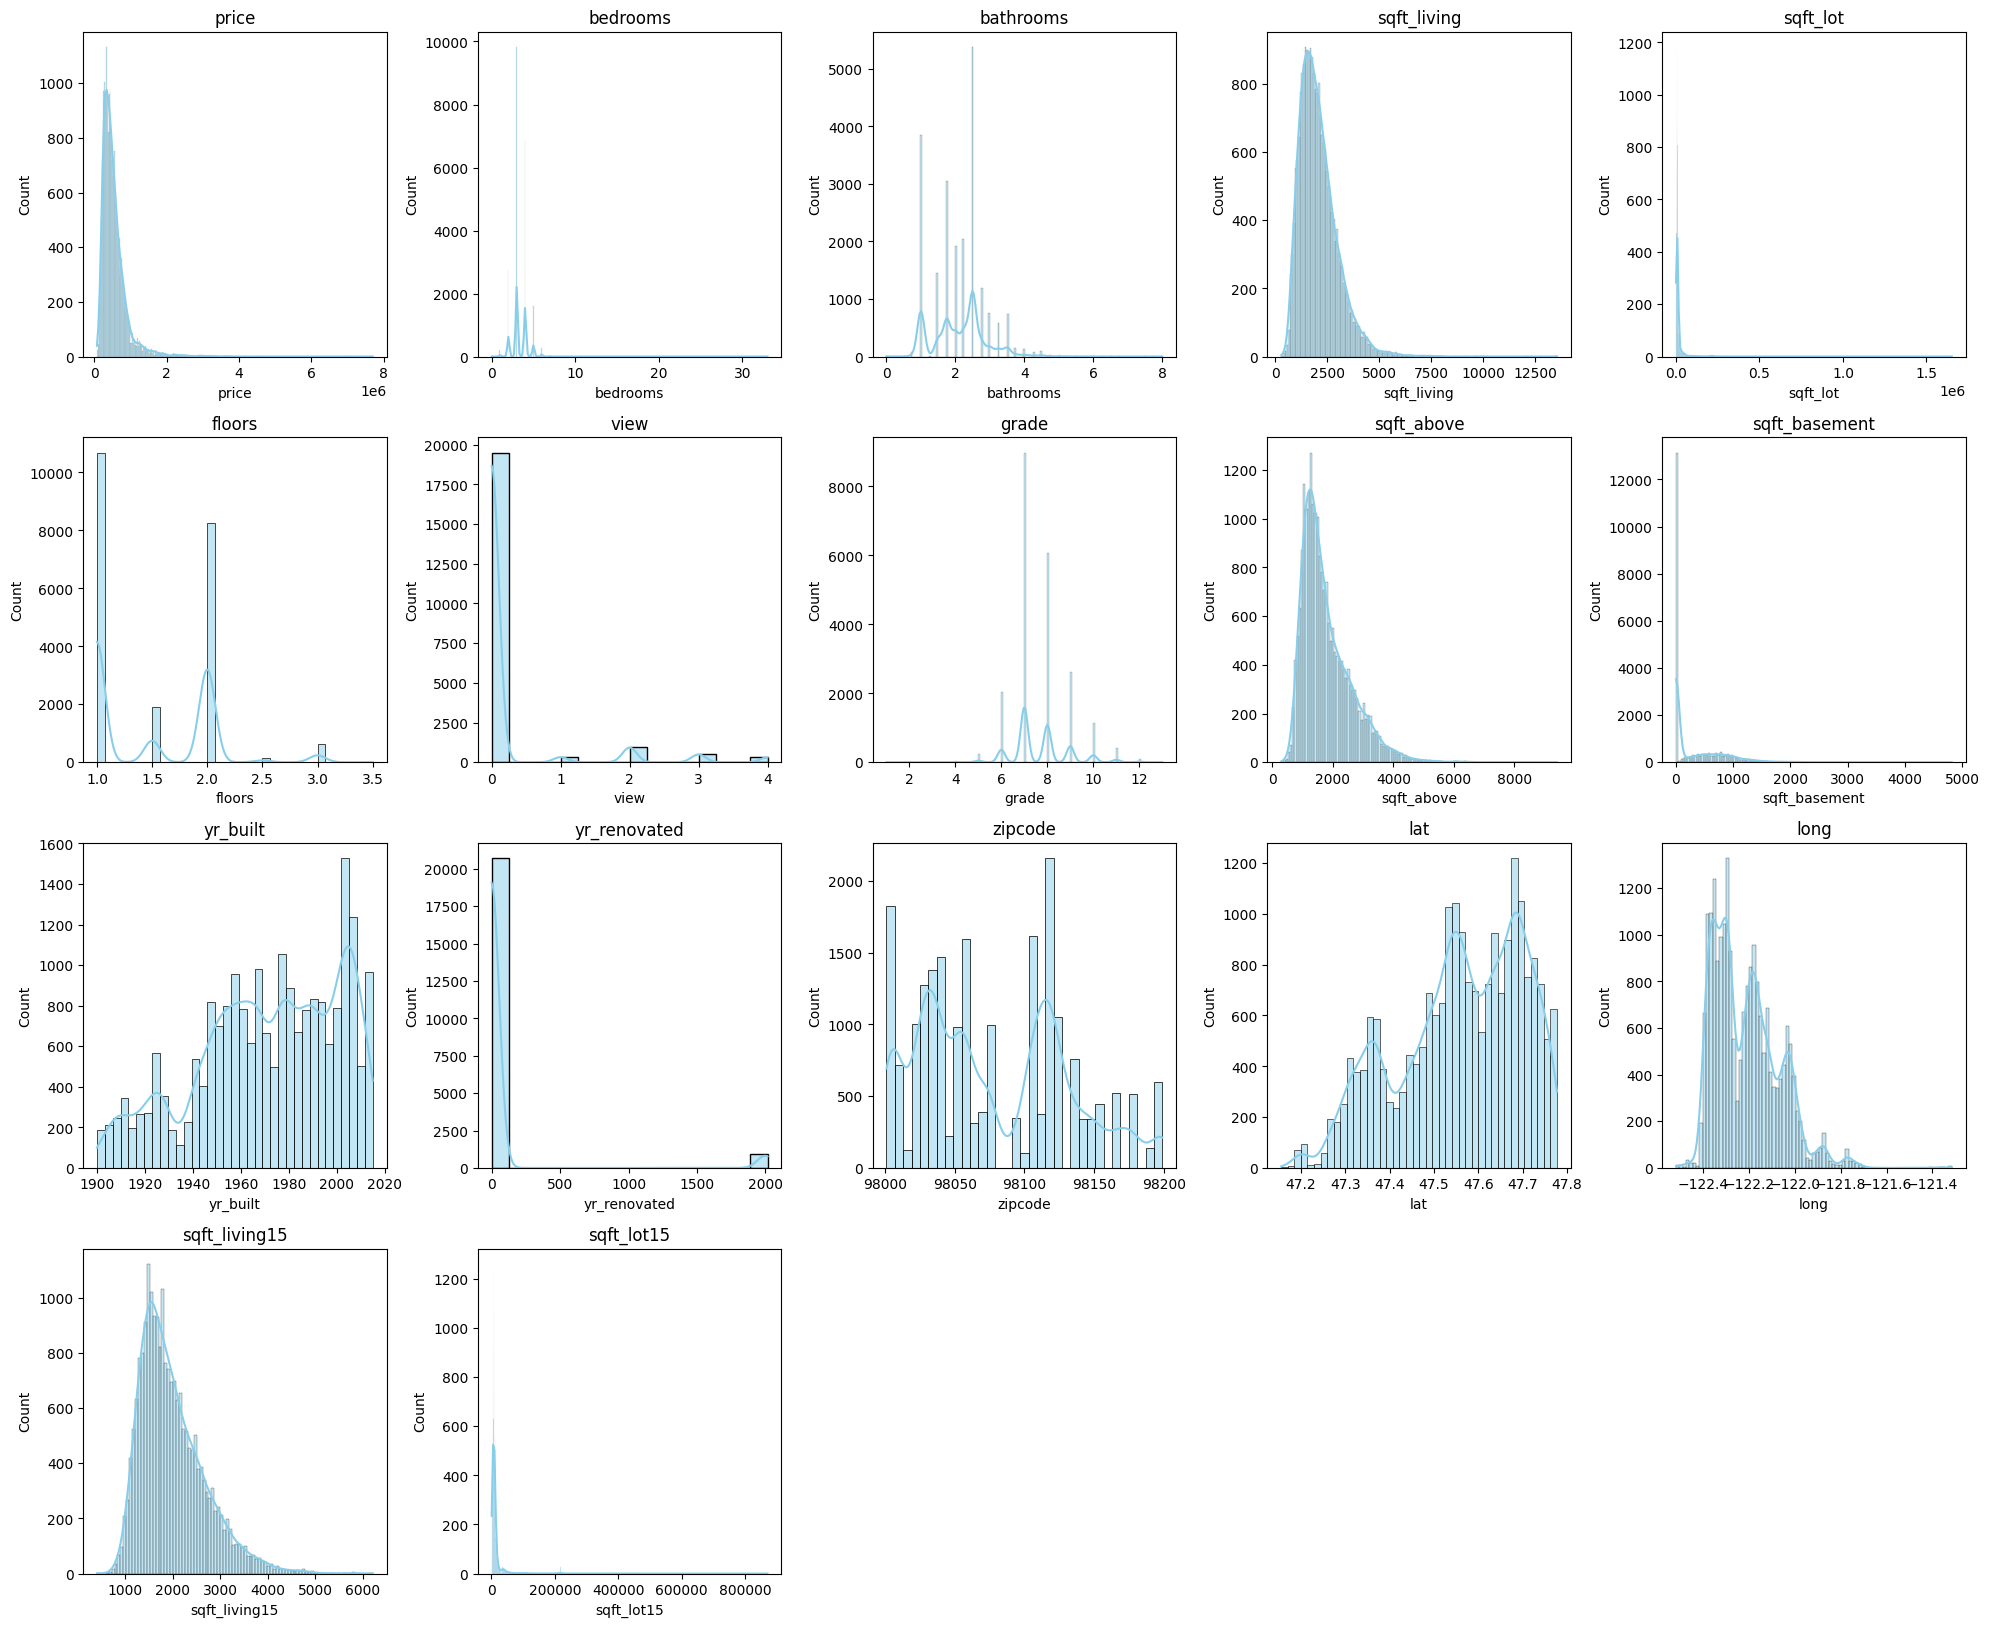

In [19]:
#distribution(freq) of numerical columns (histplot)

fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(num_columns):
    sns.histplot(x=df[col], ax=axes[i], color='skyblue', kde=True)
    axes[i].set_title(col)

for i in range(len(num_columns), 25):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

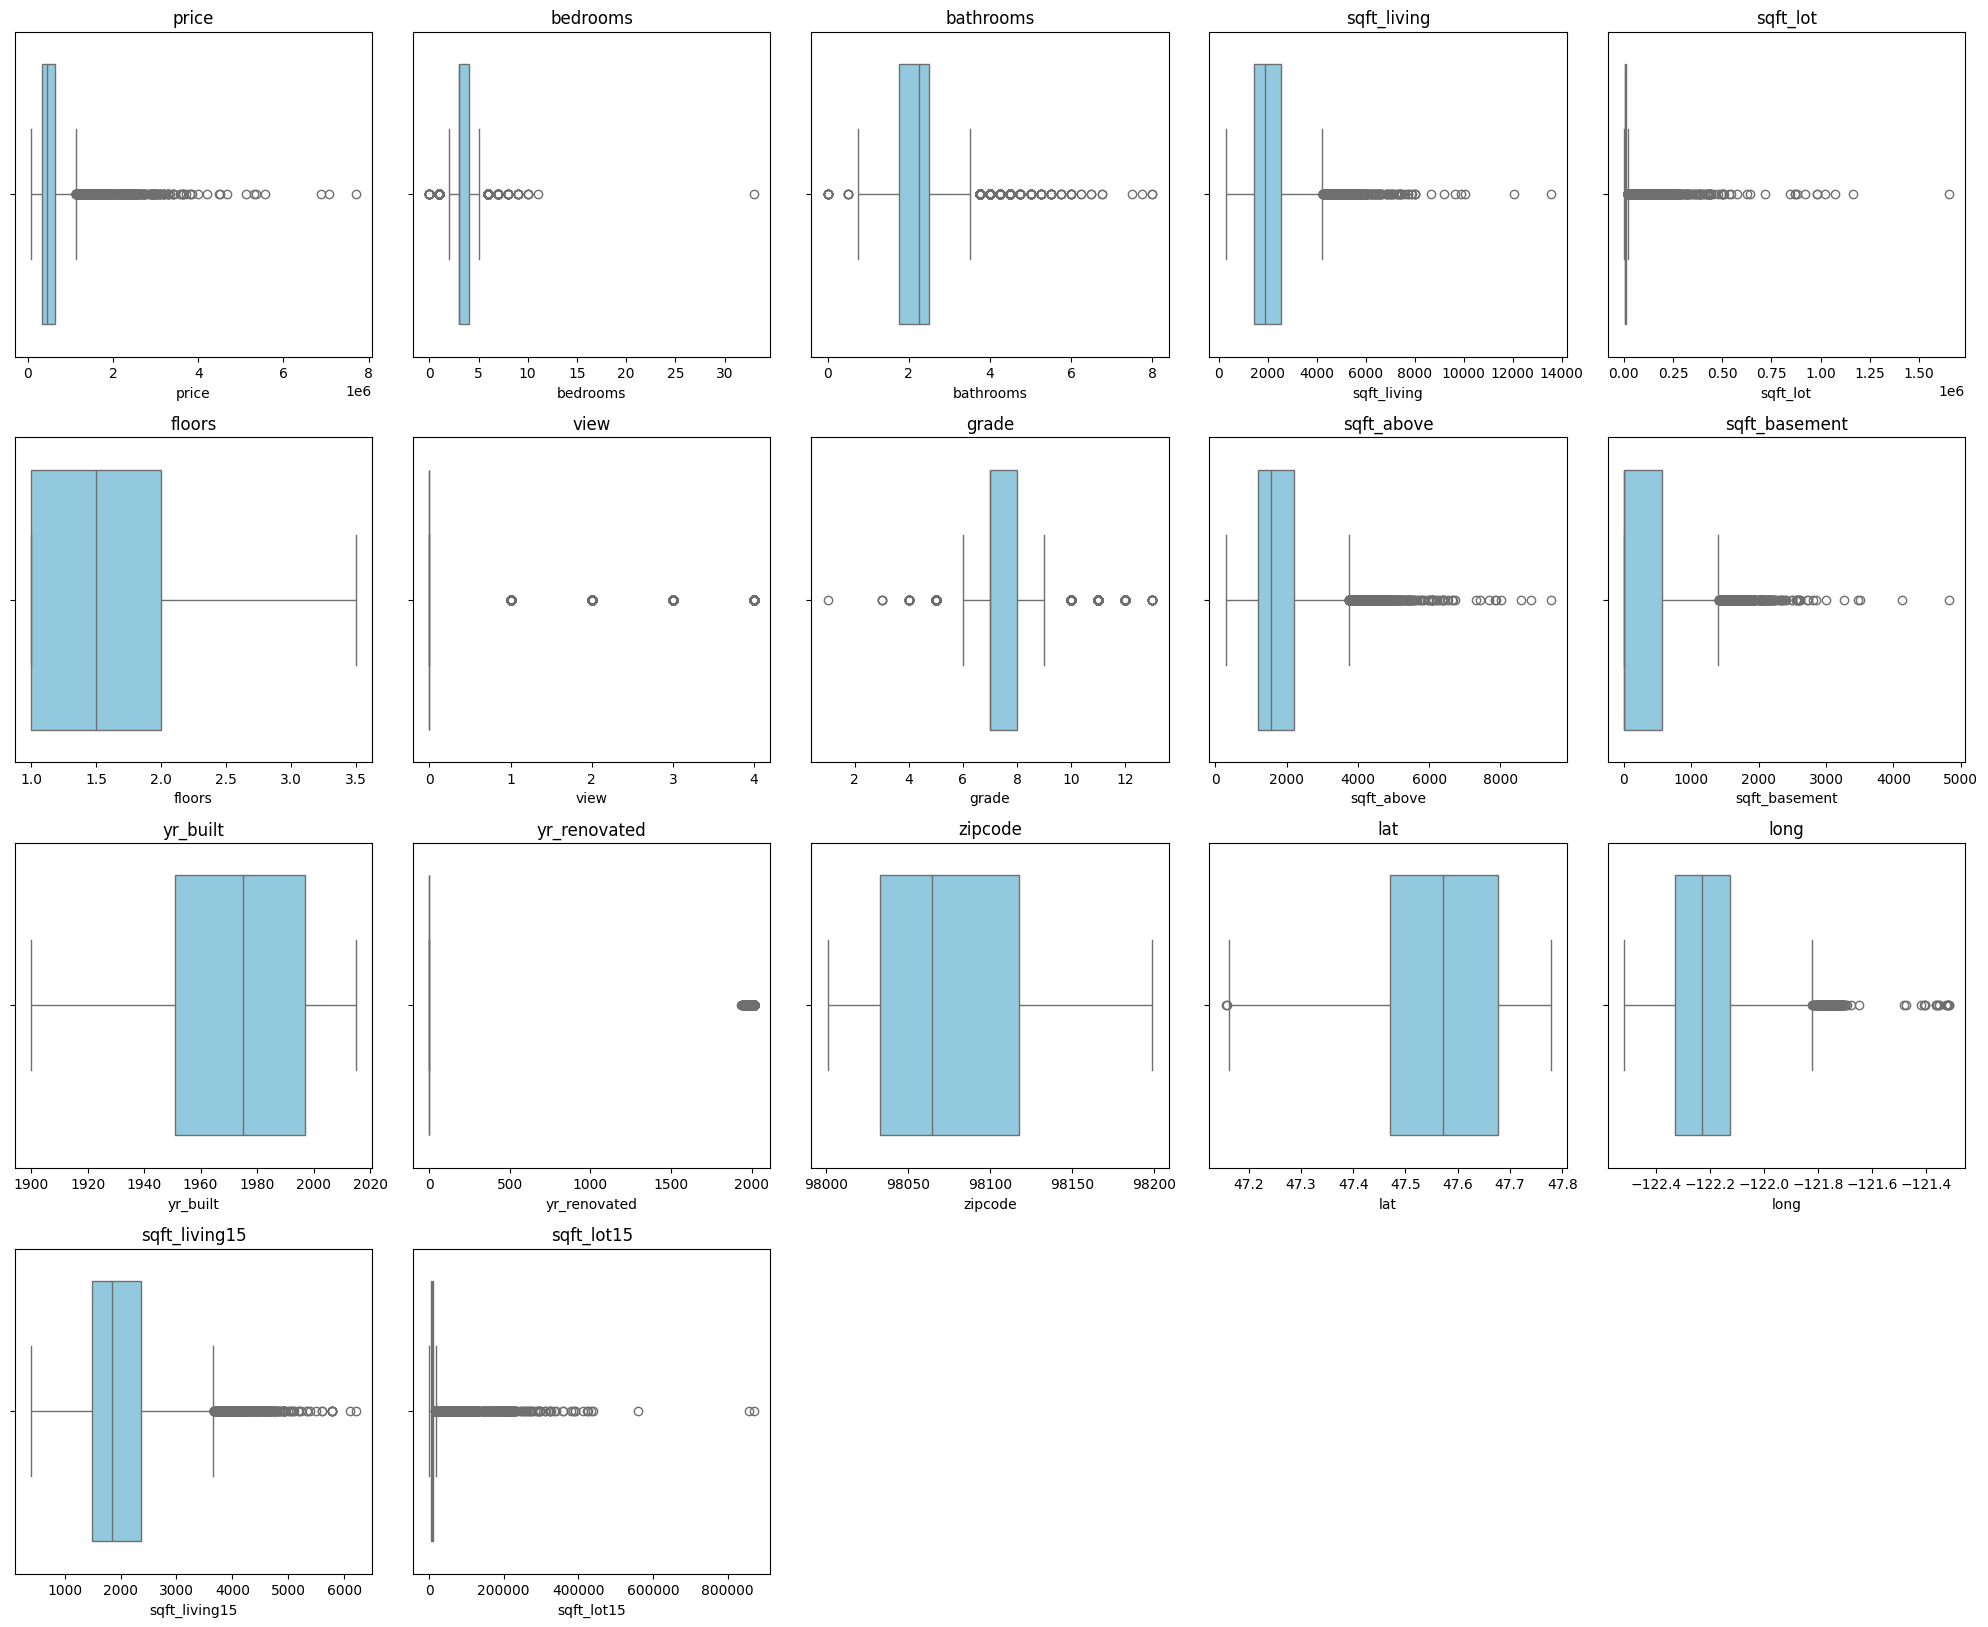

In [20]:
#box plot

fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()
for i, col in enumerate(num_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

for i in range(len(num_columns), 25):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

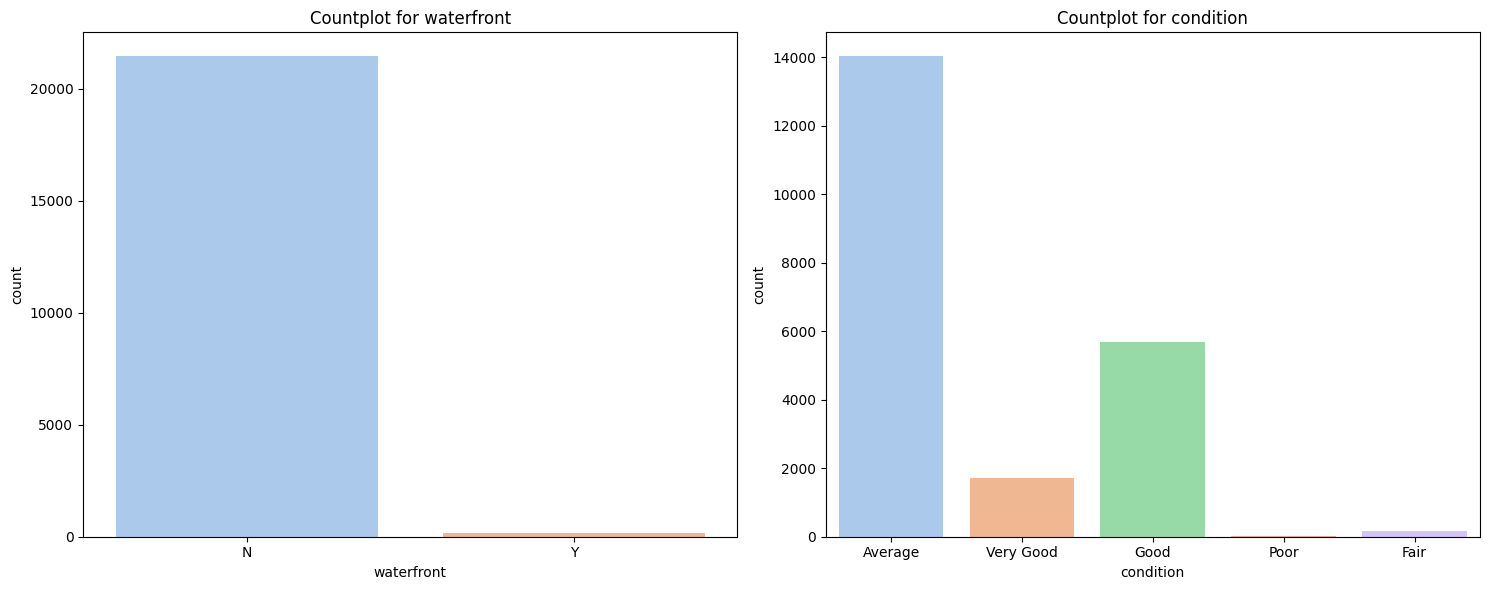

In [21]:
#Bar plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns
axes = axes.ravel()

for i, col in enumerate(cat_columns):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette="pastel", legend=False)
    axes[i].set_title(f'Countplot for {col}')

plt.tight_layout()
plt.show()

In [22]:
#detect outliers
for col in  num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers= df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}' has {len(outliers)} outliers.")

Column 'price' has 1146 outliers.
Column 'bedrooms' has 546 outliers.
Column 'bathrooms' has 571 outliers.
Column 'sqft_living' has 572 outliers.
Column 'sqft_lot' has 2424 outliers.
Column 'floors' has 0 outliers.
Column 'view' has 2124 outliers.
Column 'grade' has 1911 outliers.
Column 'sqft_above' has 611 outliers.
Column 'sqft_basement' has 496 outliers.
Column 'yr_built' has 0 outliers.
Column 'yr_renovated' has 914 outliers.
Column 'zipcode' has 0 outliers.
Column 'lat' has 2 outliers.
Column 'long' has 256 outliers.
Column 'sqft_living15' has 544 outliers.
Column 'sqft_lot15' has 2193 outliers.


In [23]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

#  handle outliers usuing clip
for col in num_columns:
    handle_outliers(df, col)



In [24]:
#detect outliers
for col in  num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers= df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}' has {len(outliers)} outliers.")

Column 'price' has 0 outliers.
Column 'bedrooms' has 0 outliers.
Column 'bathrooms' has 0 outliers.
Column 'sqft_living' has 0 outliers.
Column 'sqft_lot' has 0 outliers.
Column 'floors' has 0 outliers.
Column 'view' has 0 outliers.
Column 'grade' has 0 outliers.
Column 'sqft_above' has 0 outliers.
Column 'sqft_basement' has 0 outliers.
Column 'yr_built' has 0 outliers.
Column 'yr_renovated' has 0 outliers.
Column 'zipcode' has 0 outliers.
Column 'lat' has 0 outliers.
Column 'long' has 0 outliers.
Column 'sqft_living15' has 0 outliers.
Column 'sqft_lot15' has 0 outliers.


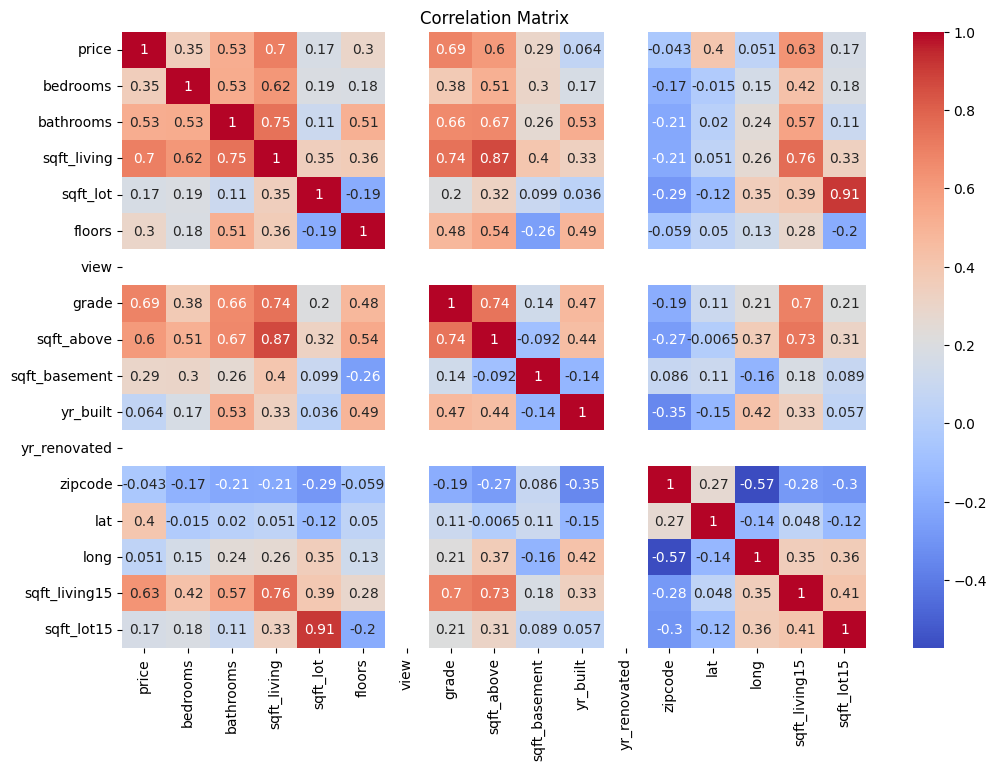

In [25]:
#correlation Heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size here (width, height) in inches
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [26]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cat_columns:
    df[column] = le.fit_transform(df[column])

In [27]:
#Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.139276,0.375,0.125000,0.225824,0.275122,0.0,0,0.0,0,0.375,0.257971,0.000000,0.478261,0.0,0.893939,0.568172,0.375089,0.288120,0.295620
1,0.438969,0.375,0.541667,0.578515,0.360501,0.4,0,0.0,0,0.375,0.544928,0.285714,0.443478,0.0,0.626263,0.908253,0.286328,0.395285,0.413240
2,0.099550,0.125,0.125000,0.121793,0.508413,0.0,0,0.0,0,0.125,0.139130,0.000000,0.286957,0.0,0.136364,0.935647,0.409449,0.710655,0.438255
3,0.501544,0.625,0.791667,0.423737,0.240263,0.0,0,0.0,4,0.375,0.220290,0.650000,0.565217,0.0,0.681818,0.583734,0.180387,0.294244,0.257181
4,0.412422,0.375,0.458333,0.352691,0.405443,0.0,0,0.0,0,0.625,0.402899,0.000000,0.756522,0.0,0.368687,0.739347,0.678597,0.428965,0.405198


# **Data Split**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:
x = df.drop(columns=['price'])
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17286, 18)
(4322, 18)
(17286,)
(4322,)





# **Linear Regression Model**



In [38]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [39]:
LR_pred = LR_model.predict(x_test)
LR_pred

array([0.4490888 , 0.41545384, 0.49379774, ..., 0.77757231, 0.44796291,
       0.11045249])

In [40]:
mse = mean_squared_error(y_test, LR_pred)
mae = mean_absolute_error(y_test, LR_pred)
r2 = r2_score(y_test, LR_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.014433378793033252
Mean Absolute Error: 0.09169565427767065
R-squared: 0.746373905154708


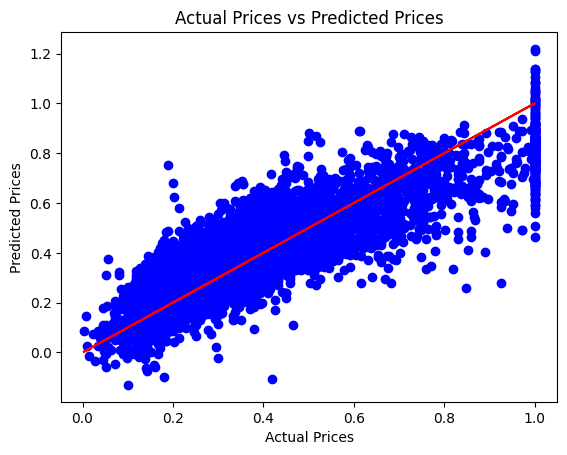

In [41]:
#scatter plot for the LR_pred and the y_test with the linear line
plt.scatter(y_test, LR_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


# **KNN Model**

In [43]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [44]:
KNN_Pred = knn_model.predict(x_test)
KNN_Pred

array([0.46277496, 0.31040715, 0.3884261 , ..., 0.9719849 , 0.43337541,
       0.1583323 ])

In [45]:
mse = mean_squared_error(y_test, KNN_Pred)
mae = mean_absolute_error(y_test, KNN_Pred)
r2 = r2_score(y_test, KNN_Pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.009663816664011206
Mean Absolute Error: 0.06733237422908768
R-squared: 0.8301855638281264


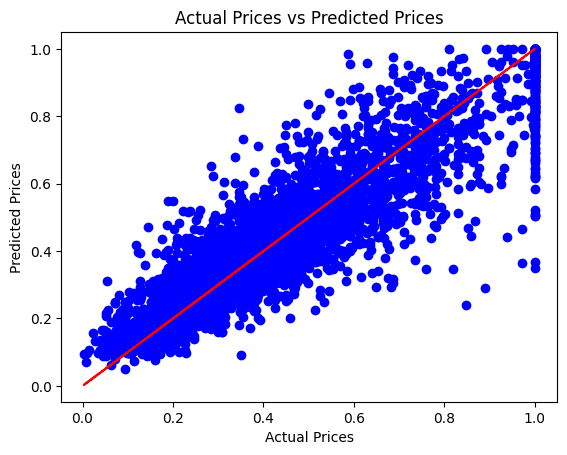

In [46]:
#scatter plot for the LR_pred and the y_test with the linear line
plt.scatter(y_test, KNN_Pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()
